In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [59]:
df=pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [60]:
df.shape

(918, 12)

In [61]:
df.info

<bound method DataFrame.info of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisea

In [62]:
df.duplicated().sum()

0

<Axes: xlabel='HeartDisease'>

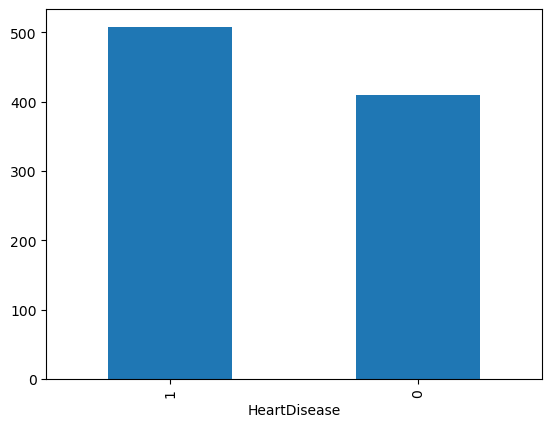

In [63]:
df["HeartDisease"].value_counts().plot(kind="bar")

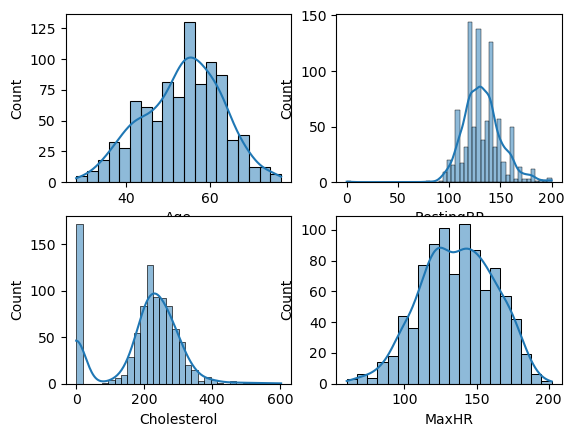

In [64]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)
plotting("Age",1)
plotting("RestingBP",2)
plotting("Cholesterol",3)
plotting("MaxHR",4)

In [65]:
df[df["RestingBP"]==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [66]:
cholesterol_mean=df[df["Cholesterol"]!=0]["Cholesterol"].mean()

In [67]:
df["Cholesterol"]=df["Cholesterol"].replace(0,cholesterol_mean)

In [68]:
restingBP_mean=df[df["Cholesterol"]!=0]["RestingBP"].mean()

In [69]:
df["RestngBP"]=df["RestingBP"].replace(0,restingBP_mean)

<Axes: xlabel='Sex', ylabel='count'>

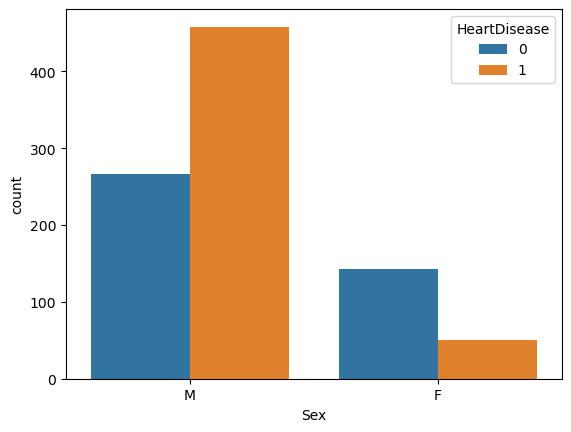

In [70]:
sns.countplot(x=df["Sex"],hue=df["HeartDisease"])

<Axes: xlabel='ChestPainType', ylabel='count'>

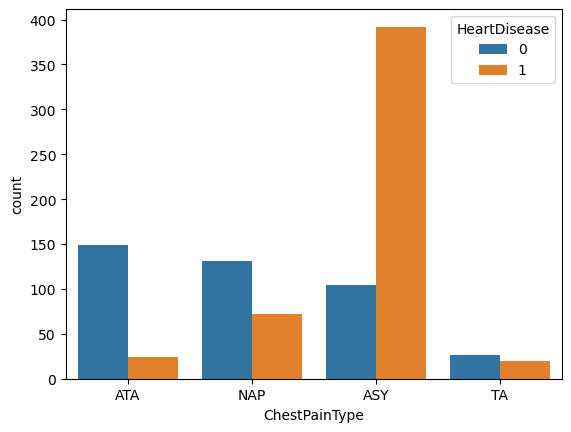

In [71]:
sns.countplot(x=df["ChestPainType"],hue=df["HeartDisease"])

<Axes: xlabel='FastingBS', ylabel='count'>

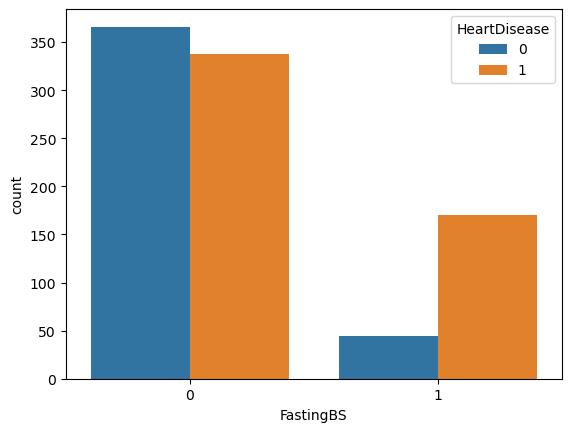

In [72]:
sns.countplot(x=df["FastingBS"],hue=df["HeartDisease"])

<Axes: xlabel='RestingECG', ylabel='count'>

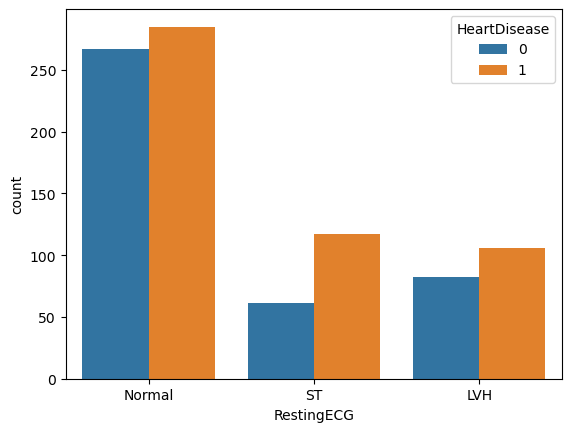

In [73]:
sns.countplot(x=df["RestingECG"],hue=df["HeartDisease"])

<Axes: xlabel='HeartDisease', ylabel='Age'>

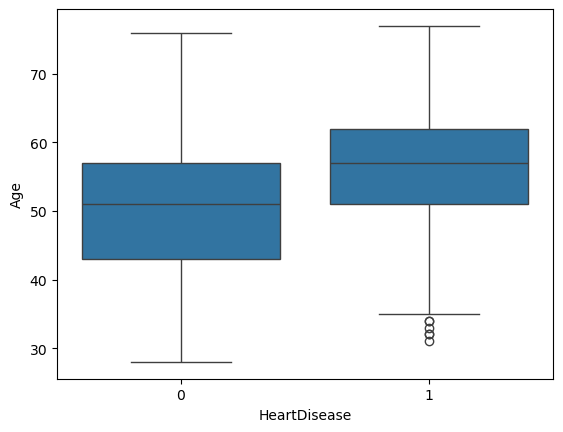

In [74]:
sns.boxplot(x=df["HeartDisease"],y=df["Age"])

<Axes: >

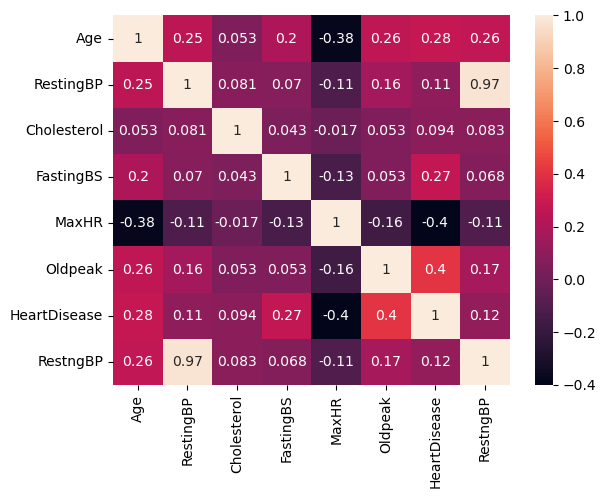

In [75]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [76]:
#Data preprocessing

In [77]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,RestngBP
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0,140.0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1,160.0
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0,130.0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1,138.0
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264.0,0,Normal,132,N,1.2,Flat,1,110.0
914,68,M,ASY,144,193.0,1,Normal,141,N,3.4,Flat,1,144.0
915,57,M,ASY,130,131.0,0,Normal,115,Y,1.2,Flat,1,130.0
916,57,F,ATA,130,236.0,0,LVH,174,N,0.0,Flat,1,130.0


In [78]:
df_encoded=pd.get_dummies(df,drop_first=True)

In [79]:
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,RestngBP,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,140.0,True,True,False,False,True,False,False,False,True
1,49,160,180.0,0,156,1.0,1,160.0,False,False,True,False,True,False,False,True,False
2,37,130,283.0,0,98,0.0,0,130.0,True,True,False,False,False,True,False,False,True
3,48,138,214.0,0,108,1.5,1,138.0,False,False,False,False,True,False,True,True,False
4,54,150,195.0,0,122,0.0,0,150.0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264.0,0,132,1.2,1,110.0,True,False,False,True,True,False,False,True,False
914,68,144,193.0,1,141,3.4,1,144.0,True,False,False,False,True,False,False,True,False
915,57,130,131.0,0,115,1.2,1,130.0,True,False,False,False,True,False,True,True,False
916,57,130,236.0,0,174,0.0,1,130.0,False,True,False,False,False,False,False,True,False


In [80]:
df_encoded=df_encoded.astype(int)

In [81]:
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,RestngBP,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,140,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,160,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,130,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,138,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,150,1,0,1,0,1,0,0,0,1


In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
numeric_cols=["Age","RestingBP","Cholesterol","MaxHR"]
scaler=StandardScaler()
df_encoded[numeric_cols]=scaler.fit_transform(df_encoded[numeric_cols])


In [84]:
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,RestngBP,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.834754,0,1.382928,0,0,140,1,1,0,0,1,0,0,0,1
1,-0.478484,1.491752,-1.210675,0,0.754157,1,1,160,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.722161,0,-1.525138,0,0,130,1,1,0,0,0,1,0,0,1
3,-0.584556,0.302825,-0.572651,0,-1.132156,1,1,138,0,0,0,0,1,0,1,1,0
4,0.051881,0.951331,-0.929194,0,-0.581981,0,0,150,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.365619,0,-0.188999,1,1,110,1,0,0,1,1,0,0,1,0
914,1.536902,0.627078,-0.966725,1,0.164684,3,1,144,1,0,0,0,1,0,0,1,0
915,0.370100,-0.129513,-2.130180,0,-0.857069,1,1,130,1,0,0,0,1,0,1,1,0
916,0.370100,-0.129513,-0.159813,0,1.461525,0,1,130,0,1,0,0,0,0,0,1,0


In [85]:
df_encoded.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'RestngBP', 'Sex_M', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal',
       'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 

In [87]:
x= df_encoded.drop('HeartDisease',axis=1)
y=df_encoded['HeartDisease']

In [88]:
x

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,RestngBP,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.834754,0,1.382928,0,140,1,1,0,0,1,0,0,0,1
1,-0.478484,1.491752,-1.210675,0,0.754157,1,160,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.722161,0,-1.525138,0,130,1,1,0,0,0,1,0,0,1
3,-0.584556,0.302825,-0.572651,0,-1.132156,1,138,0,0,0,0,1,0,1,1,0
4,0.051881,0.951331,-0.929194,0,-0.581981,0,150,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.365619,0,-0.188999,1,110,1,0,0,1,1,0,0,1,0
914,1.536902,0.627078,-0.966725,1,0.164684,3,144,1,0,0,0,1,0,0,1,0
915,0.370100,-0.129513,-2.130180,0,-0.857069,1,130,1,0,0,0,1,0,1,1,0
916,0.370100,-0.129513,-0.159813,0,1.461525,0,130,0,1,0,0,0,0,0,1,0


In [89]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [90]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.fit_transform(X_test)

In [91]:
models={
    "logostic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Naive Byes": GaussianNB(),
    "Decision tree": DecisionTreeClassifier(),
    "SVM": SVC()
    
}

In [100]:
result=[]
for name,model in models.items():
    model.fit(x_train_scaled,y_train)
    y_pred=model.predict(x_test_scaled)
    acc=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    result.append({
        'model':name,
        'Accuracy': round(acc,4),
        'f1 score':round(f1,4)
    })
    

In [101]:
result

[{'model': 'logostic Regression', 'Accuracy': 0.8696, 'f1 score': 0.8857},
 {'model': 'KNN', 'Accuracy': 0.8587, 'f1 score': 0.8762},
 {'model': 'Naive Byes', 'Accuracy': 0.8533, 'f1 score': 0.8683},
 {'model': 'Decision tree', 'Accuracy': 0.7554, 'f1 score': 0.7805},
 {'model': 'SVM', 'Accuracy': 0.8424, 'f1 score': 0.8626}]

In [104]:
import joblib 
joblib.dump(models['KNN'],'KNN_heart.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(x.columns.tolist(),'columns.pkl')

['columns.pkl']